# Intensive Care in Germany

## Data Source

[DIVI-Intensivregister](https://www.intensivregister.de/) monitors the ICU capacities of 1,300 hospitals in Germany.

## Setup

In [29]:
# standard library
import datetime
import math

In [30]:
# third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Date this Notebook was run

In [31]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
today

'2021-09-19'

In [32]:
# style like ggplot in R
plt.style.use('ggplot')

In [33]:
# Avoid cutting off part of the axis labels, see:
# https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.rcParams.update({'figure.autolayout': True})

## Get Data

In [34]:
timeline_data = "https://diviexchange.blob.core.windows.net/%24web/bundesland-zeitreihe.csv"

In [35]:
timeline_df = pd.read_csv(timeline_data)

In [36]:
timeline_df.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
9330,2021-09-19T12:15:00+02:00,BREMEN,11,13,152,11,129,15,6,1,4,6,0
9331,2021-09-19T12:15:00+02:00,BAYERN,206,278,2661,499,1000,453,176,64,36,72,34
9332,2021-09-19T12:15:00+02:00,DEUTSCHLAND,1312,1530,18671,3553,10357,3048,1197,504,252,409,147


## Rename Columns

### Convert datatype of date column

In [37]:
timeline_df["Datum"] = timeline_df["Datum"].str[:10]
timeline_df.head()

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
0,2020-03-20,SCHLESWIG_HOLSTEIN,13,7,16,99,0,68,0,11,2,0,0
1,2020-03-20,HAMBURG,11,6,24,115,0,70,0,9,0,2,0
2,2020-03-20,BADEN_WUERTTEMBERG,31,35,39,330,0,205,0,20,7,3,1
3,2020-03-20,SACHSEN,20,3,44,272,0,215,0,16,2,2,0
4,2020-03-20,RHEINLAND_PFALZ,15,14,48,112,0,62,0,10,3,2,0


In [38]:
timeline_df.iloc[ : , [0]] = timeline_df.iloc[ : , [0]].apply(pd.to_datetime)

In [39]:
timeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Datum                                       9333 non-null   datetime64[ns]
 1   Bundesland                                  9333 non-null   object        
 2   Anzahl_Meldebereiche_Erwachsene             9333 non-null   int64         
 3   Aktuelle_COVID_Faelle_Erwachsene_ITS        9333 non-null   int64         
 4   Belegte_Intensivbetten_Erwachsene           9333 non-null   int64         
 5   Freie_Intensivbetten_Erwachsene             9333 non-null   int64         
 6   7_Tage_Notfallreserve_Erwachsene            9333 non-null   int64         
 7   Freie_IV_Kapazitaeten_Gesamt                9333 non-null   int64         
 8   Freie_IV_Kapazitaeten_Davon_COVID           9333 non-null   int64         
 9   Betriebs

In [40]:
federal_level = timeline_df[timeline_df.Bundesland=='DEUTSCHLAND']
federal_level.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
9298,2021-09-17,DEUTSCHLAND,1313,1534,19441,3103,10324,2785,1116,518,242,404,149
9315,2021-09-18,DEUTSCHLAND,1314,1515,18999,3339,10359,2923,1204,518,248,400,148
9332,2021-09-19,DEUTSCHLAND,1312,1530,18671,3553,10357,3048,1197,504,252,409,147


## Used Beds (Adults)

In [41]:
used_beds = federal_level.loc[ : , ['Datum', 'Belegte_Intensivbetten_Erwachsene']]
used_beds.columns = ['date', 'ICU beds in use (adults)']
used_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 16 to 9332
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      549 non-null    datetime64[ns]
 1   ICU beds in use (adults)  549 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.9 KB


In [42]:
used_beds.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

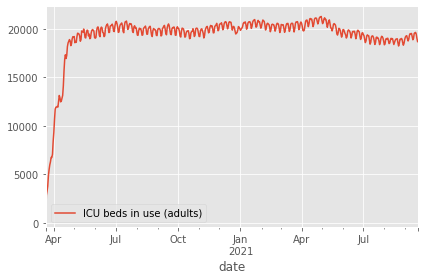

In [43]:
used_beds.plot()

## Covid-19 patients in ICU

In [44]:
icu = federal_level.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]

In [45]:
icu.columns = ['date', 'Covid-19 cases in ICU']
icu.set_index('date', inplace=True)
icu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 2020-03-20 to 2021-09-19
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  549 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


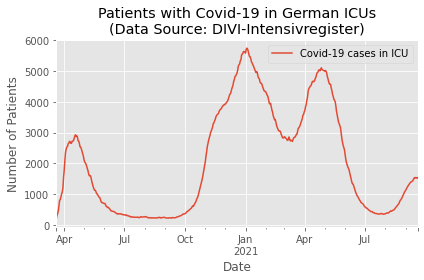

In [46]:
icu_cases = icu.plot(
    title='Patients with Covid-19 in German ICUs\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

In [47]:
fig = icu_cases.get_figure()
fig.savefig('img/covid-19-patients-in-icu-germany.png')

### Situation in North Rhine-Westphalia

NRW ist the state in Germany with the highest number of inhabitants.

In [48]:
nrw = timeline_df[timeline_df.Bundesland=='NORDRHEIN_WESTFALEN']
nrw.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
9307,2021-09-18,NORDRHEIN_WESTFALEN,312,409,4587,691,2391,582,296,127,66,99,20
9325,2021-09-19,NORDRHEIN_WESTFALEN,311,409,4497,734,2384,598,290,123,65,103,20


In [49]:
icu_nrw = nrw.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_nrw.columns = ['date', 'Covid-19 cases in ICU']
icu_nrw.set_index('date', inplace=True)
icu_nrw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 2020-03-20 to 2021-09-19
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  549 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


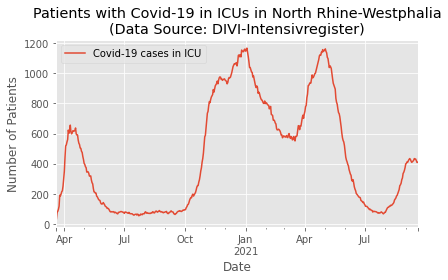

In [50]:
icu_cases_nrw = icu_nrw.plot(
    title='Patients with Covid-19 in ICUs in North Rhine-Westphalia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Rhineland-Palatinate

In [51]:
rlp = timeline_df[timeline_df.Bundesland=='RHEINLAND_PFALZ']
rlp.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
9303,2021-09-18,RHEINLAND_PFALZ,77,82,787,206,415,160,80,30,17,24,6
9320,2021-09-19,RHEINLAND_PFALZ,77,78,782,207,422,164,79,30,17,24,6


In [52]:
icu_rlp = rlp.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_rlp.columns = ['date', 'Covid-19 cases in ICU']
icu_rlp.set_index('date', inplace=True)
icu_rlp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 2020-03-20 to 2021-09-19
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  549 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


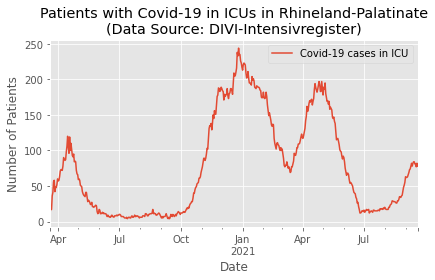

In [53]:
icu_cases_rlp = icu_rlp.plot(
    title='Patients with Covid-19 in ICUs in Rhineland-Palatinate\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Saxony

Saxonia had high case numbers during the pandemic.

In [54]:
saxonia = timeline_df[timeline_df.Bundesland=='SACHSEN']
saxonia.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
9302,2021-09-18,SACHSEN,79,36,1226,252,629,276,95,48,8,12,11
9319,2021-09-19,SACHSEN,79,37,1192,283,628,285,95,48,9,11,11


In [55]:
icu_saxonia = saxonia.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_saxonia.columns = ['date', 'Covid-19 cases in ICU']
icu_saxonia.set_index('date', inplace=True)
icu_saxonia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 2020-03-20 to 2021-09-19
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  549 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


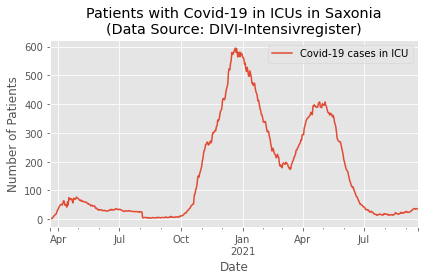

In [56]:
icu_cases_saxonia = icu_saxonia.plot(
    title='Patients with Covid-19 in ICUs in Saxonia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')